https://www.edmundoptics.de/p/254mm-dia-x-381mm-fl-mgfsub2sub-coated-achromatic-doublet-lens/10215/


SURFACE LIST
Class:OpSysData
    #     Distance    Curvature     Material         Type 
    0    45.500000     0.000000            1     standard 
    1    10.500000     0.037922      N-BAF10     standard 
    2     3.000000    -0.048948        N-SF6     standard 
    3     5.000000    -0.009828            1     standard 
    4     0.000000     0.000000            1     standard 


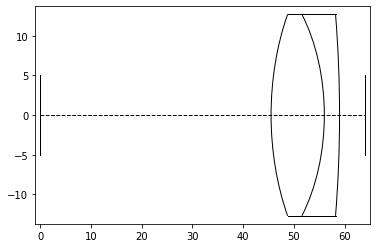

In [1]:
#Design1
from JenTrace.opt_sys import OpSysData
syst1 = OpSysData()

syst1.add_surface(10.50 ,1/26.37    ,'N-BAF10')
syst1.add_surface(3.00  ,1/-20.43   ,'N-SF6')
syst1.add_surface(5     ,1/-101.75  ,1)

#Modify object distance (surfIndex #0)
syst1.change_surface(45.5 ,0 ,1 ,surfIndex=0)

#Show system
clearSemDia=[10/2,25.4/2,25.4/2,25.4/2,10/2]
syst1.print_report()
syst1.plot_optical_system(clearSemDia)


In [2]:
from JenTrace.ray_src import InfinitySource
#InfinitySource: Ray source with a common direction.
pto1=InfinitySource([0,0,1],587.6)

#Show rays
pto1.print_report()


RAY LIST
Class:InfinitySource
    #         XPos         YPos         ZPos      XCosDir      YCosDir      ZCosDir   Wavelength 
    0     0.000000     0.000000     0.000000     0.000000     0.000000     1.000000   587.600000 
    1     0.000000     0.000000     0.000000     0.000000     0.000000     1.000000   587.600000 
    2     0.000000     0.000000     0.000000     0.000000     0.000000     1.000000   587.600000 
    3     0.000000     0.000000     0.000000     0.000000     0.000000     1.000000   587.600000 
    4     0.000000     0.000000     0.000000     0.000000     0.000000     1.000000   587.600000 



RAY LIST
Class:InfinitySource
    #         XPos         YPos         ZPos      XCosDir      YCosDir      ZCosDir   Wavelength 
    0    -0.000000    -0.000000     0.000000     0.000000     0.000000     1.000000   587.600000 
    1     0.000015     8.000029     0.000000     0.000000     0.000000     1.000000   587.600000 
    2    -0.000015    -8.000029     0.000000     0.000000     0.000000     1.000000   587.600000 
    3     8.000029     0.000015     0.000000     0.000000     0.000000     1.000000   587.600000 
    4    -7.999945     0.000002     0.000000     0.000000     0.000000     1.000000   587.600000 

SURFACE LIST
Class:OpSysData
    #     Distance    Curvature     Material         Type 
    0    45.500000     0.000000            1     standard 
    1    10.500000     0.037922      N-BAF10     standard 
    2     3.000000    -0.048948        N-SF6     standard 
    3     5.000000    -0.009828            1     standard 
    4     0.000000     0.000000            1     standar

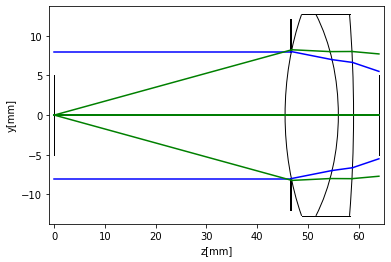

In [3]:
from JenTrace.opt_dsg import OpDesign
#Aperture radius
aprRad = 8.0 #mm
#Aperture position (Surface index)
aprInd = 1
#Create an optical design. 
design1  = OpDesign(pto1,syst1,aprRad,aprInd)

#Plot design
design1.usrSrc.print_report()
design1.optSys.print_report()
design1.plot_design(clearSemDia)


RAY LIST
Class:InfinitySource
    #         XPos         YPos         ZPos      XCosDir      YCosDir      ZCosDir   Wavelength 
    0    -0.000000    -0.000000     0.000000     0.000000     0.000000     1.000000   587.600000 
    1     0.000015     8.000029     0.000000     0.000000     0.000000     1.000000   587.600000 
    2    -0.000015    -8.000029     0.000000     0.000000     0.000000     1.000000   587.600000 
    3     8.000029     0.000015     0.000000     0.000000     0.000000     1.000000   587.600000 
    4    -7.999945     0.000002     0.000000     0.000000     0.000000     1.000000   587.600000 

SURFACE LIST
Class:OpSysData
    #     Distance    Curvature     Material         Type 
    0    45.500000     0.000000            1     standard 
    1    10.500000     0.037922      N-BAF10     standard 
    2     3.000000    -0.048948        N-SF6     standard 
    3    30.537354    -0.009828            1     standard 
    4     0.000000     0.000000            1     standar

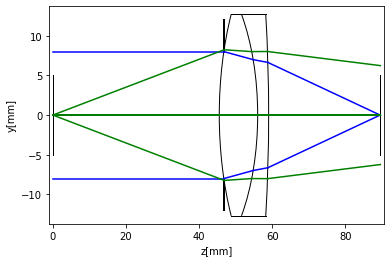

In [4]:
design1.autofocus() 

#Plot design
design1.usrSrc.print_report()
design1.optSys.print_report()
design1.plot_design(clearSemDia)

From the last result the working distance can be calculated, i.e. 30.537354 mm


SURFACE LIST
Class:OpSysData
    #     Distance    Curvature     Material         Type 
    0    30.537354     0.000000            1     standard 
    1     3.000000     0.009828        N-SF6     standard 
    2    10.500000     0.048948      N-BAF10     standard 
    3    19.050000    -0.037922            1     standard 
    4    42.490000     0.000000            1     standard 
    5    10.500000     0.037922      N-BAF10     standard 
    6     3.000000    -0.048948        N-SF6     standard 
    7    30.537354    -0.009828            1     standard 
    8     0.000000     0.000000            1     standard 


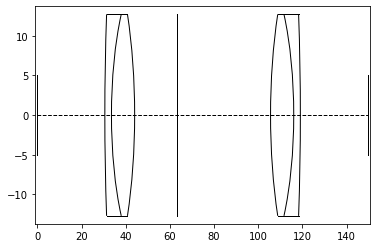

In [5]:
# Design 2
#from JenTrace.opt_sys import OpSysData
syst2 = OpSysData()

x = 19.05
totalDist = 30.77*2

#Modify object distance (surfIndex #0)
syst2.change_surface(30.537354 ,0 ,1 ,surfIndex=0)

syst2.add_surface(10.50 ,1/26.37    ,'N-BAF10')
syst2.add_surface(3.00  ,1/-20.43   ,'N-SF6')
syst2.add_surface(x     ,1/-101.75  ,1)
syst2.invert_surface_order(1, 3)

syst2.add_surface(totalDist-x,0  ,1)

syst2.add_surface(10.50     ,1/26.37    ,'N-BAF10')
syst2.add_surface(3.00      ,1/-20.43   ,'N-SF6')
syst2.add_surface(30.537354 ,1/-101.75  ,1)

#Show system
clearSemDia=[10/2,25.4/2,25.4/2,25.4/2,25.4/2,25.4/2,25.4/2,25.4/2,10/2]
syst2.print_report()
syst2.plot_optical_system(clearSemDia)

In [6]:
from JenTrace.ray_src import PointSource
#PointSource: Ray source with a common starting point.
pto2=PointSource([0,4,0],587.6)
#pto2=InfinitySource([0,0,1],587.6)

#Show rays
pto2.print_report()


RAY LIST
Class:PointSource
    #         XPos         YPos         ZPos      XCosDir      YCosDir      ZCosDir   Wavelength 
    0     0.000000     4.000000     0.000000     0.000000     0.000000     1.000000   587.600000 
    1     0.000000     4.000000     0.000000     0.000000     0.000000     1.000000   587.600000 
    2     0.000000     4.000000     0.000000     0.000000     0.000000     1.000000   587.600000 
    3     0.000000     4.000000     0.000000     0.000000     0.000000     1.000000   587.600000 
    4     0.000000     4.000000     0.000000     0.000000     0.000000     1.000000   587.600000 



RAY LIST
Class:PointSource
    #         XPos         YPos         ZPos      XCosDir      YCosDir      ZCosDir   Wavelength 
    0     0.000000     4.000000     0.000000    -0.000002    -0.049568     0.998771   587.600000 
    1     0.000000     4.000000     0.000000     0.000003     0.059529     0.998227   587.600000 
    2     0.000000     4.000000     0.000000     0.000002    -0.154407     0.988007   587.600000 
    3     0.000000     4.000000     0.000000     0.105866    -0.048625     0.993191   587.600000 
    4     0.000000     4.000000     0.000000    -0.105866    -0.048618     0.993191   587.600000 

SURFACE LIST
Class:OpSysData
    #     Distance    Curvature     Material         Type 
    0    30.537354     0.000000            1     standard 
    1     3.000000     0.009828        N-SF6     standard 
    2    10.500000     0.048948      N-BAF10     standard 
    3    19.050000    -0.037922            1     standard 
    4    42.490000     0.000000            1     standard 


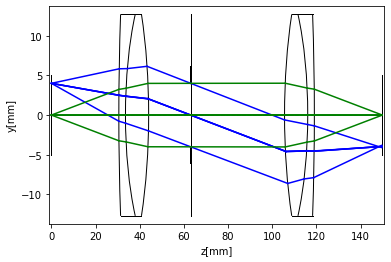

In [7]:
#from JenTrace.opt_dsg import OpDesign
#Aperture radius
aprRad = 4.0 #mm
#Aperture position (Surface index)
aprInd = 4
#Create an optical design. 
design2  = OpDesign(pto2,syst2,aprRad,aprInd,'telecentric')

#Plot design
design2.usrSrc.print_report()
design2.optSys.print_report()
design2.plot_design(clearSemDia)

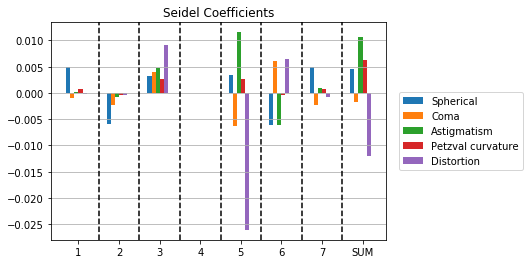

In [8]:
from JenTrace.abr_fnc import seidel_coef, plot_seidel
#Calculate seidel coefficeints for primary aberrations
SCoef =  seidel_coef(design2)
plot_seidel(SCoef)

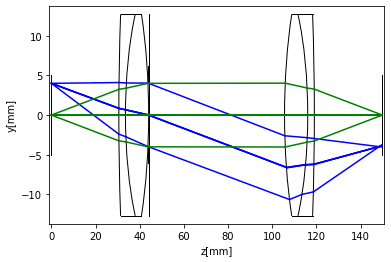

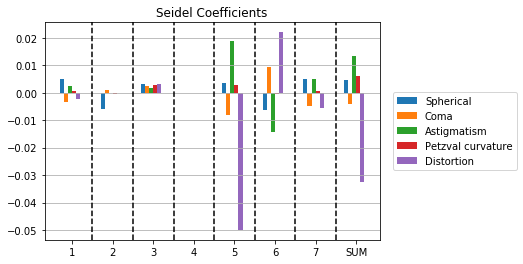

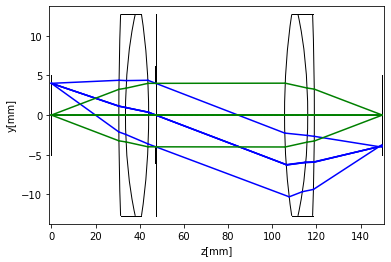

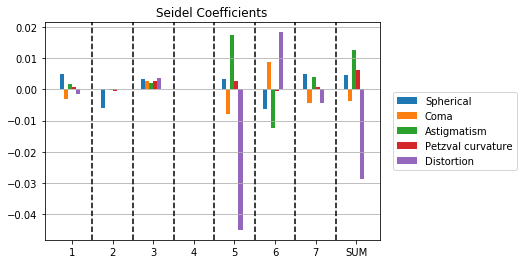

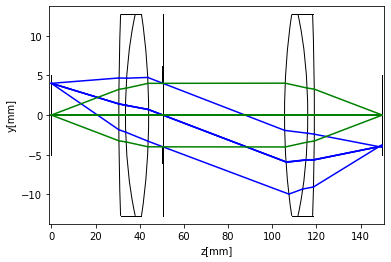

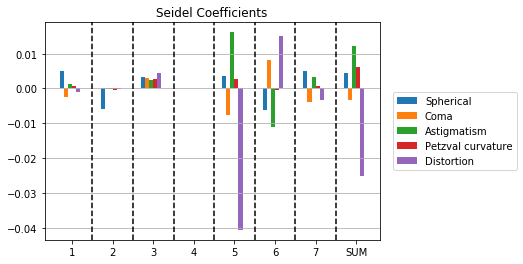

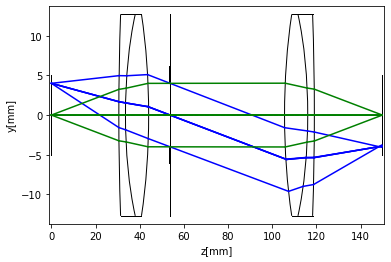

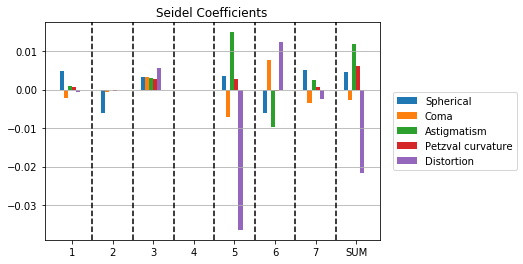

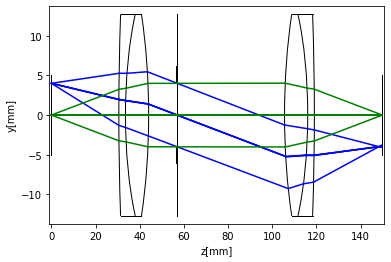

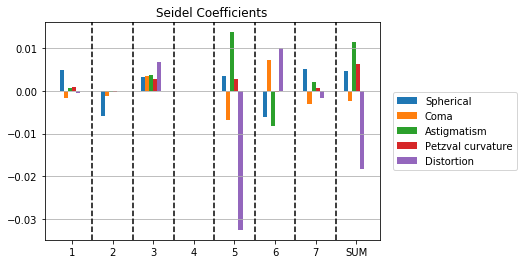

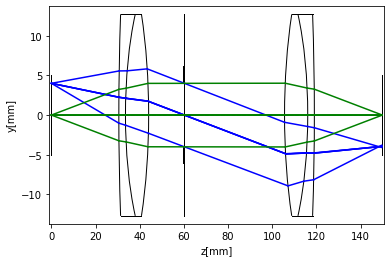

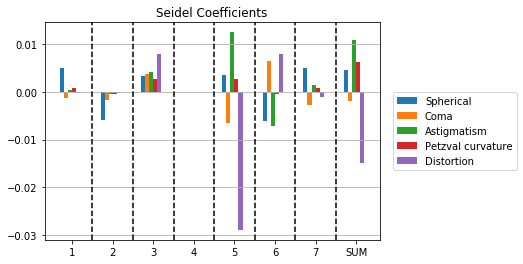

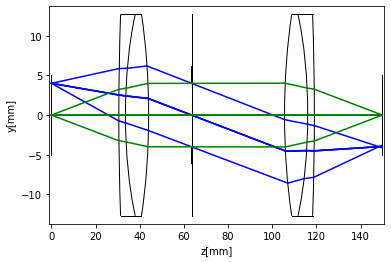

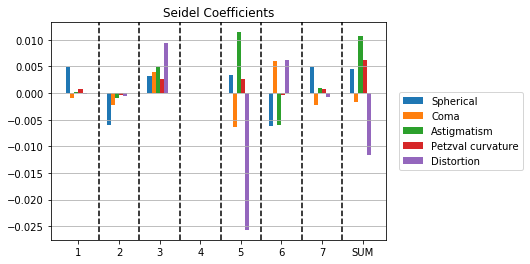

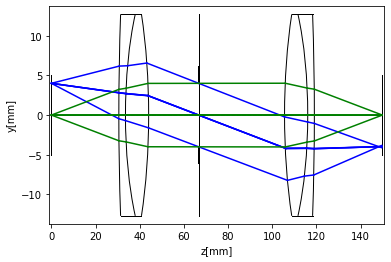

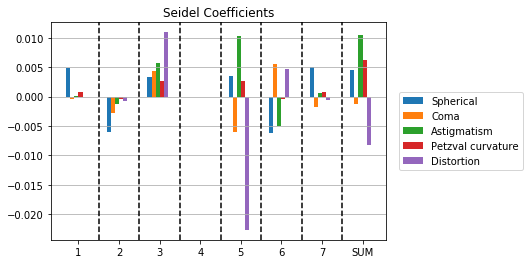

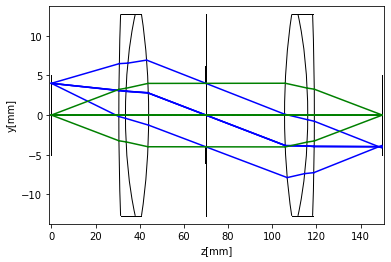

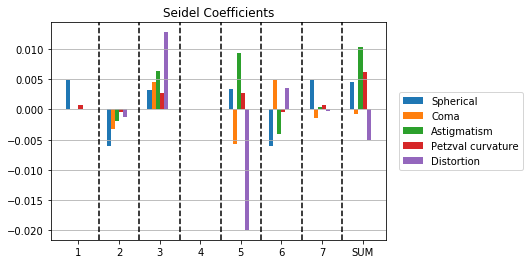

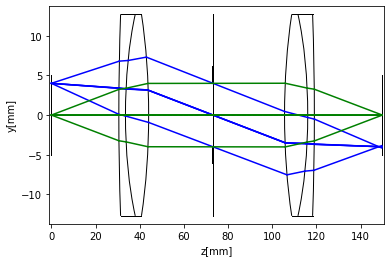

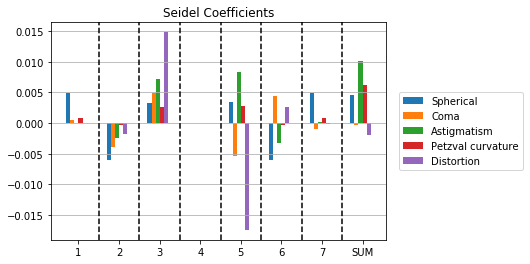

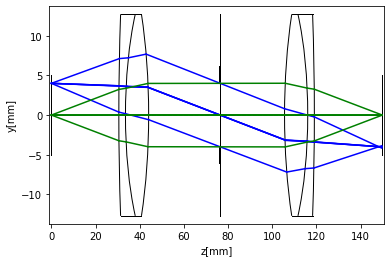

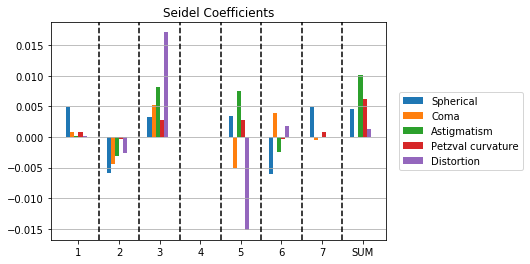

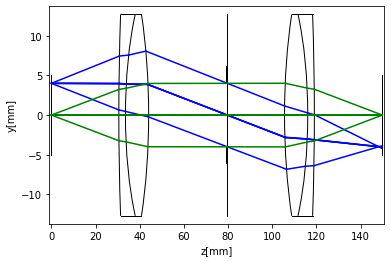

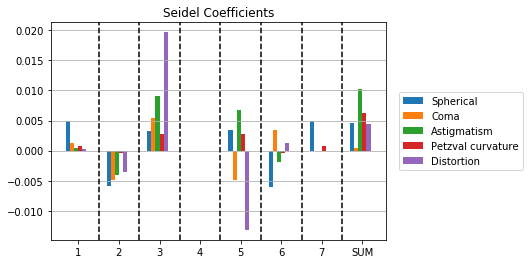

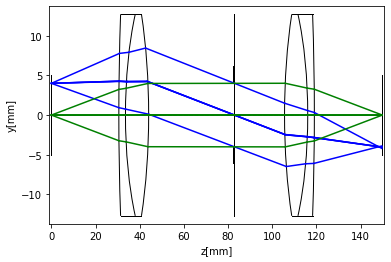

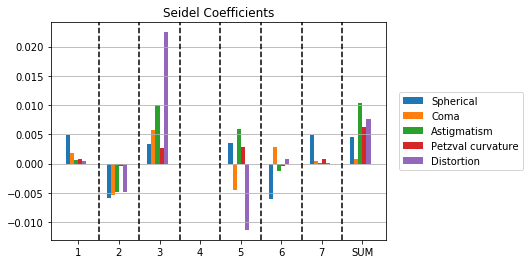

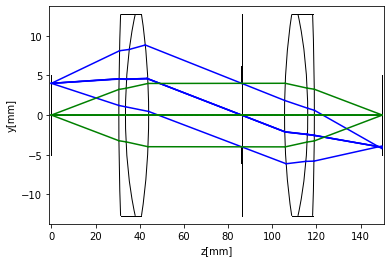

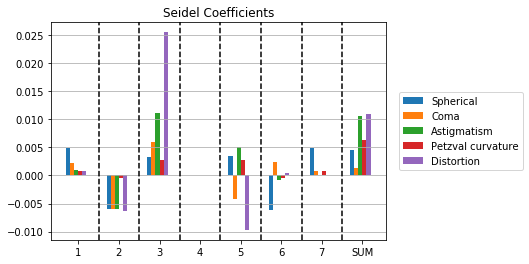

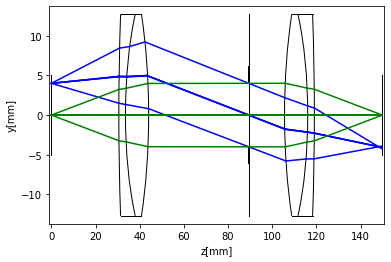

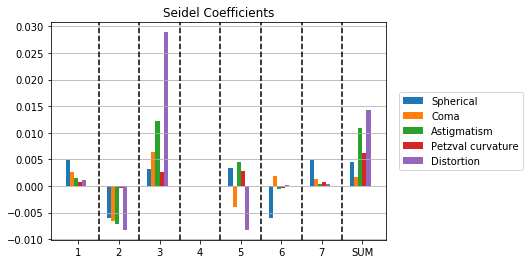

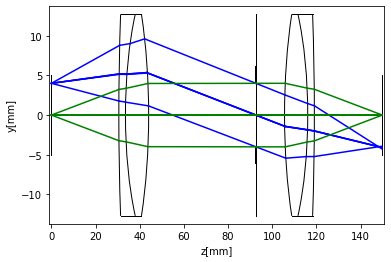

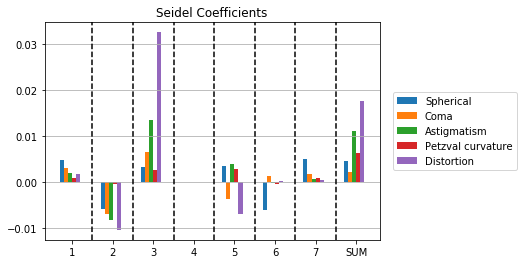

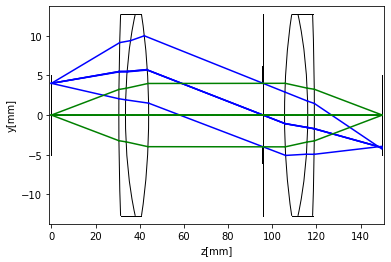

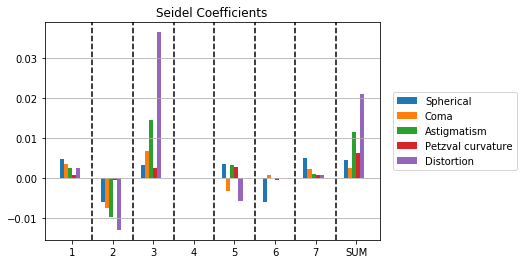

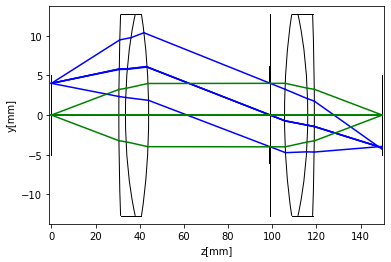

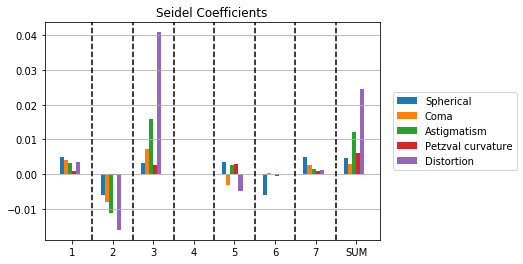

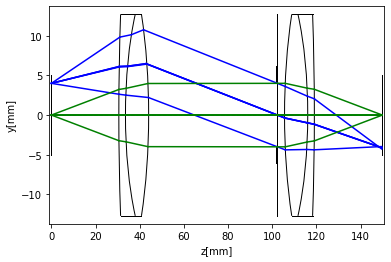

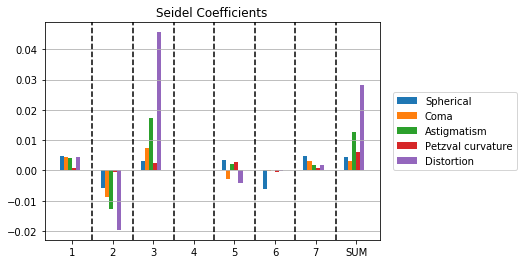

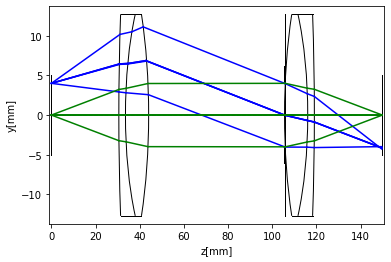

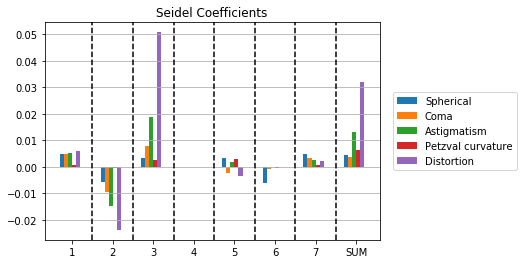

In [9]:
#Design 3
#from JenTrace.opt_sys import OpSysData
import numpy as np

#Aperture radius
aprRad = 4.0 #mm
#Aperture position (Surface index)
aprInd = 4

#Parameter of the for loop, x
totalDist = 30.77*2

#Universal plot parameters
ASposX=[]
seidel=[]

for x in np.linspace(0,totalDist,20):
    syst3 = OpSysData()
    
    #Modify object distance (surfIndex #0)
    syst3.change_surface(30.537354 ,0 ,1 ,surfIndex=0)
    
    syst3.add_surface(10.50 ,1/26.37    ,'N-BAF10')
    syst3.add_surface(3.00  ,1/-20.43   ,'N-SF6')
    syst3.add_surface(x     ,1/-101.75  ,1)
    syst3.invert_surface_order(1, 3)
    
    syst3.add_surface(totalDist-x,0  ,1)
    
    syst3.add_surface(10.50     ,1/26.37    ,'N-BAF10')
    syst3.add_surface(3.00      ,1/-20.43   ,'N-SF6')
    syst3.add_surface(30.537354 ,1/-101.75  ,1)
    
    #Show system
    #clearSemDia=[10/2,25.4/2,25.4/2,25.4/2,25.4/2,25.4/2,25.4/2,25.4/2,10/2]
    #syst3.print_report()
    #syst3.plot_optical_system(clearSemDia)
    
    #PointSource: Ray source with a common starting point.
    pto3=PointSource([0,4,0],587.6)
    
    #Create an optical design. 
    design3  = OpDesign(pto3,syst3,aprRad,aprInd,'telecentric')
    design3.plot_design(clearSemDia)
    
    #Calculate seidel coefficeints for primary aberrations
    SCoef =  seidel_coef(design3)
    plot_seidel(SCoef)
    
    ASposX.append(x)
    seidel.append(np.sum(SCoef,1))

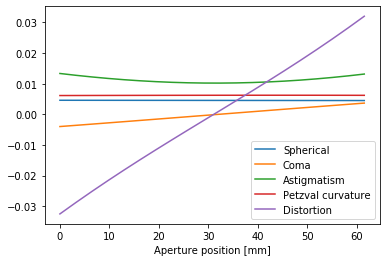

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ASposX,[abe[0] for abe in seidel], label='Spherical')
plt.plot(ASposX,[abe[1] for abe in seidel], label='Coma')
plt.plot(ASposX,[abe[2] for abe in seidel], label='Astigmatism')
plt.plot(ASposX,[abe[3] for abe in seidel], label='Petzval curvature')
plt.plot(ASposX,[abe[4] for abe in seidel], label='Distortion')
plt.xlabel('Aperture position [mm]')
plt.legend()
plt.show()